In [5]:
import pandas as pd
import glob
import os

file_path = '../HO-5minHLVFULL_INSAMP_FULL_OUTSAMP_/OUTSAMPLE_START_199010010000_OUTSAMPLE_END_202310010000.csv'


df = pd.read_csv(file_path)
print(df.head())
df['YYYY'] = df['YYYY'].astype(str)
df['MM'] = df['MM'].apply(lambda x: f"{x:02d}")
df['DD'] = df['DD'].apply(lambda x: f"{x:02d}")
df['hh'] = df['hh'].apply(lambda x: f"{x:02d}")
df['mm'] = df['mm'].apply(lambda x: f"{x:02d}")
df['timestamp'] = pd.to_datetime(df['YYYY'] + '-' + df['MM'] + '-' + df['DD'] + ' ' + df['hh'] + ':' + df['mm'])
df = df.drop(columns=['YYYY', 'MM', 'DD', 'hh', 'mm'])

df['net equity'] = df['Equity'].diff().fillna(0) 

df = df.sort_values(by='timestamp')

df['actual equity'] = df['Equity']

df['actual equity'][1:] = df['net equity'][1:].cumsum() + df['Equity'].iloc[0]


   YYYY  MM  DD  hh  mm  Chnlen  StpPct  Equity  Drawdown  Position
0  1990  10   1   9  55    1500   0.015  200000       0.0         0
1  1990  10   1  10   0    1500   0.015  200000       0.0         0
2  1990  10   1  10   5    1500   0.015  200000       0.0         0
3  1990  10   1  10  10    1500   0.015  200000       0.0         0
4  1990  10   1  10  15    1500   0.015  200000       0.0         0


/var/folders/4s/kkf94s7s013511xsv5c9mznc0000gn/T/ipykernel_13090/2059895766.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['actual equity'][1:] = df['net equity'][1:].cumsum() + df['Equity'].iloc[0]


In [11]:
import pandas as pd
import os
import glob

def process_csv_files(folder_path):
    csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

    df_combined = pd.DataFrame()

    for file in csv_files:

        df = pd.read_csv(file)
        df['YYYY'] = df['YYYY'].astype(str)
        df['MM'] = df['MM'].apply(lambda x: f"{x:02d}")
        df['DD'] = df['DD'].apply(lambda x: f"{x:02d}")
        df['hh'] = df['hh'].apply(lambda x: f"{x:02d}")
        df['mm'] = df['mm'].apply(lambda x: f"{x:02d}")
        df['timestamp'] = pd.to_datetime(df['YYYY'] + '-' + df['MM'] + '-' + df['DD'] + ' ' + df['hh'] + ':' + df['mm'])
        df = df.drop(columns=['YYYY', 'MM', 'DD', 'hh', 'mm'])

        df['net equity'] = df['Equity'].diff().fillna(0)  

        df_combined = pd.concat([df_combined, df], ignore_index=True)

    df_combined = df_combined.sort_values(by='timestamp')

    df_combined['actual equity'] = df_combined['Equity']

    df_combined['actual equity'][1:] = df_combined['net equity'][1:].cumsum() + df_combined['Equity'].iloc[0].copy()

    df_combined.set_index('timestamp', inplace=True)
    
    return df_combined

folder_path1 = '/Users/zhanglijingnan/Desktop/math_method/HO-5minHLV_INSAMP_3_OUTSAMP_1_/outsample'
df_combined1 = process_csv_files(folder_path1)
folder_path2 = '/Users/zhanglijingnan/Desktop/math_method/HO-5minHLV_INSAMP_3_OUTSAMP_2_/outsample'
df_combined2 = process_csv_files(folder_path2)
folder_path3 = '/Users/zhanglijingnan/Desktop/math_method/HO-5minHLV_INSAMP_3_OUTSAMP_3_/outsample'
df_combined3 = process_csv_files(folder_path3)
folder_path4 = '/Users/zhanglijingnan/Desktop/math_method/HO-5minHLV_INSAMP_3_OUTSAMP_6_/outsample'
df_combined4 = process_csv_files(folder_path4)
folder_path5 = '/Users/zhanglijingnan/Desktop/math_method/HO-5minHLV_INSAMP_4_OUTSAMP_1_/outsample'
df_combined5 = process_csv_files(folder_path5)
folder_path6 = '/Users/zhanglijingnan/Desktop/math_method/HO-5minHLV_INSAMP_4_OUTSAMP_2_/outsample'
#df_combined6 = process_csv_files(folder_path6)
folder_path7 = '/Users/zhanglijingnan/Desktop/math_method/HO-5minHLV_INSAMP_4_OUTSAMP_3_/outsample'
df_combined7 = process_csv_files(folder_path7)
folder_path8 = '/Users/zhanglijingnan/Desktop/math_method/HO-5minHLV_INSAMP_4_OUTSAMP_6_/outsample'
df_combined8 = process_csv_files(folder_path8)



AttributeError: 'int' object has no attribute 'copy'

In [15]:
import pandas as pd
import os
import glob

def process_csv_files(folder_path):
    csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

    df_combined = pd.DataFrame()

    for file in csv_files:

        df = pd.read_csv(file)
        df['YYYY'] = df['YYYY'].astype(str)
        df['MM'] = df['MM'].apply(lambda x: f"{x:02d}")
        df['DD'] = df['DD'].apply(lambda x: f"{x:02d}")
        df['hh'] = df['hh'].apply(lambda x: f"{x:02d}")
        df['mm'] = df['mm'].apply(lambda x: f"{x:02d}")
        df['timestamp'] = pd.to_datetime(df['YYYY'] + '-' + df['MM'] + '-' + df['DD'] + ' ' + df['hh'] + ':' + df['mm'])
        df = df.drop(columns=['YYYY', 'MM', 'DD', 'hh', 'mm'])

        df['net equity'] = df['Equity'].diff().fillna(0)  

        df_combined = pd.concat([df_combined, df], ignore_index=True)

    df_combined = df_combined.sort_values(by='timestamp')

    df_combined['actual equity'] = df_combined['Equity']
    
    df_copy = df_combined

    df_copy['actual equity'][1:] = df_combined['net equity'][1:].cumsum() + df_combined['Equity'].iloc[0]

    df_copy.set_index('timestamp', inplace=True)
    
    return df_copy

folder_path1 = '/Users/zhanglijingnan/Desktop/math_method/HO-5minHLV_INSAMP_3_OUTSAMP_1_/outsample'
df_combined1 = process_csv_files(folder_path1)
folder_path2 = '/Users/zhanglijingnan/Desktop/math_method/HO-5minHLV_INSAMP_3_OUTSAMP_2_/outsample'
df_combined2 = process_csv_files(folder_path2)
folder_path3 = '/Users/zhanglijingnan/Desktop/math_method/HO-5minHLV_INSAMP_3_OUTSAMP_3_/outsample'
df_combined3 = process_csv_files(folder_path3)
folder_path4 = '/Users/zhanglijingnan/Desktop/math_method/HO-5minHLV_INSAMP_3_OUTSAMP_6_/outsample'
df_combined4 = process_csv_files(folder_path4)
folder_path5 = '/Users/zhanglijingnan/Desktop/math_method/HO-5minHLV_INSAMP_4_OUTSAMP_1_/outsample'
df_combined5 = process_csv_files(folder_path5)
folder_path6 = '/Users/zhanglijingnan/Desktop/math_method/HO-5minHLV_INSAMP_4_OUTSAMP_2_/outsample'
df_combined6 = process_csv_files(folder_path6)
folder_path7 = '/Users/zhanglijingnan/Desktop/math_method/HO-5minHLV_INSAMP_4_OUTSAMP_3_/outsample'
df_combined7 = process_csv_files(folder_path7)
folder_path8 = '/Users/zhanglijingnan/Desktop/math_method/HO-5minHLV_INSAMP_4_OUTSAMP_6_/outsample'
df_combined8 = process_csv_files(folder_path8)

/var/folders/1g/rdnj360j27nbhmkw5l08x5280000gn/T/ipykernel_18937/679841294.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['actual equity'][1:] = df_combined['net equity'][1:].cumsum() + df_combined['Equity'].iloc[0]
/var/folders/1g/rdnj360j27nbhmkw5l08x5280000gn/T/ipykernel_18937/679841294.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['actual equity'][1:] = df_combined['net equity'][1:].cumsum() + df_combined['Equity'].iloc[0]
/var/folders/1g/rdnj360j27nbhmkw5l08x5280000gn/T/ipykernel_18937/679841294.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

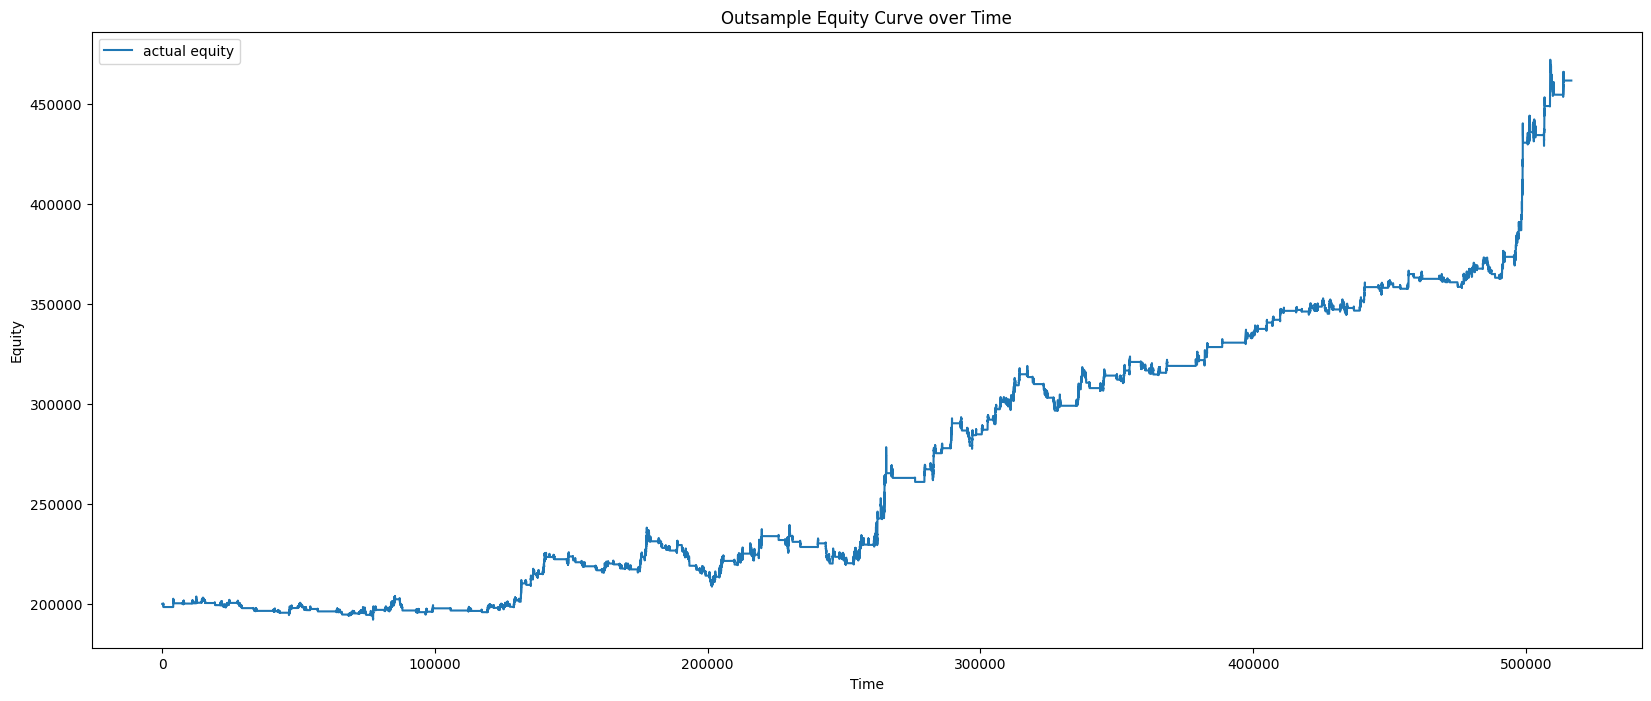

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
df['actual equity'].plot()
# df_combined1['actual equity'].plot(label='insample 3 years & outsample 1 month')
# df_combined2['actual equity'].plot(label='insample 3 years & outsample 2 month')
# df_combined3['actual equity'].plot(label='insample 3 years & outsample 3 month')
# df_combined4['actual equity'].plot(label='insample 3 years & outsample 6 month')
# df_combined5['actual equity'].plot(label='insample 4 years & outsample 1 month')
# df_combined6['actual equity'].plot(label='insample 4 years & outsample 2 month')
# df_combined7['actual equity'].plot(label='insample 4 years & outsample 3 month')
# df_combined8['actual equity'].plot(label='insample 4 years & outsample 6 month')
plt.xlabel('Time')
plt.ylabel('Equity')
plt.title('Outsample Equity Curve over Time')
plt.legend()
plt.show()


In [3]:
import numpy as np

folder_path = '/Users/zhanglijingnan/Desktop/math_method/HO-5minHLV_INSAMP_3_OUTSAMP_3_/insample'

file = 'INSAMPLE_START_199701010000_INSAMPLE_END_200001010000.csv'

file_path = f'{folder_path}/{file}'  

df = pd.read_csv(file_path)
    
df['Net Asset to Worst Drawdown'] = df['Equity']/abs(df['MaxDrawdown'])
df['Sharpe Ratio'] = df['DeltaMean']/ df['Std']*np.sqrt(252)                                                               
df[['Chnlen','StpPct','Net Asset to Worst Drawdown','Sharpe Ratio']]


,Chnlen,StpPct,Net Asset to Worst Drawdown,Sharpe Ratio
0,5240,0.005,43.370791,-0.012149
1,7610,0.005,55.270252,0.022454
2,5240,0.006,41.889960,-0.001820
3,2870,0.005,40.117736,-0.022200
4,500,0.005,33.949947,0.059889
...,...,...,...,...
91291,10000,0.096,28.981041,0.147256
91292,10000,0.097,28.679463,0.146808
91293,10000,0.098,28.383980,0.146356
91294,10000,0.099,28.094270,0.145960


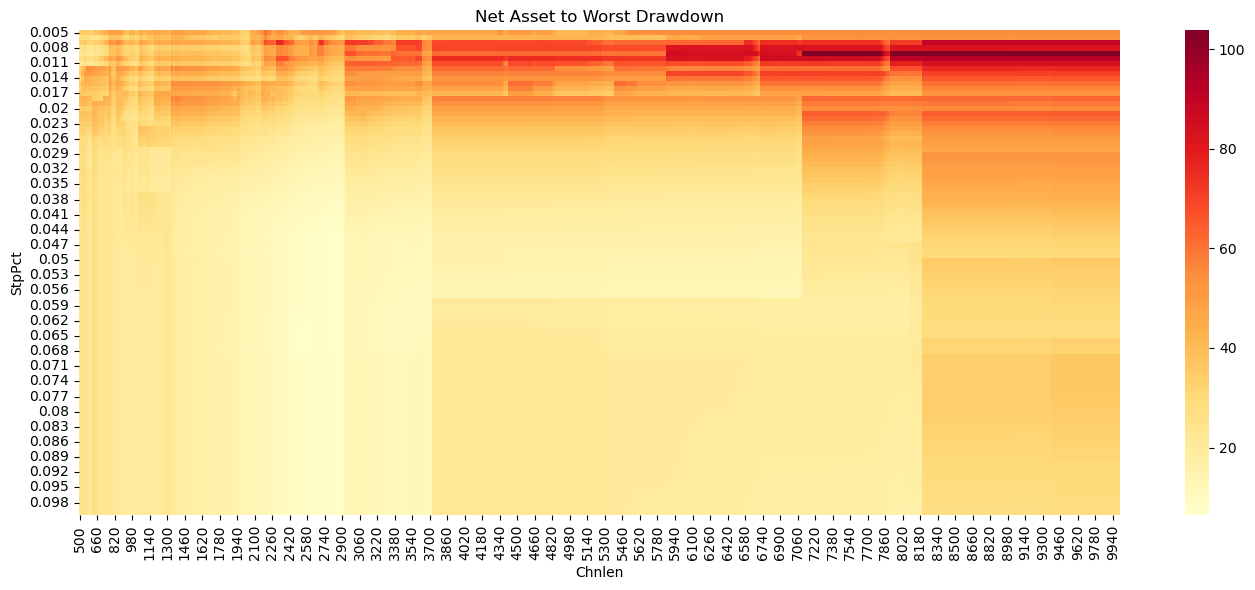

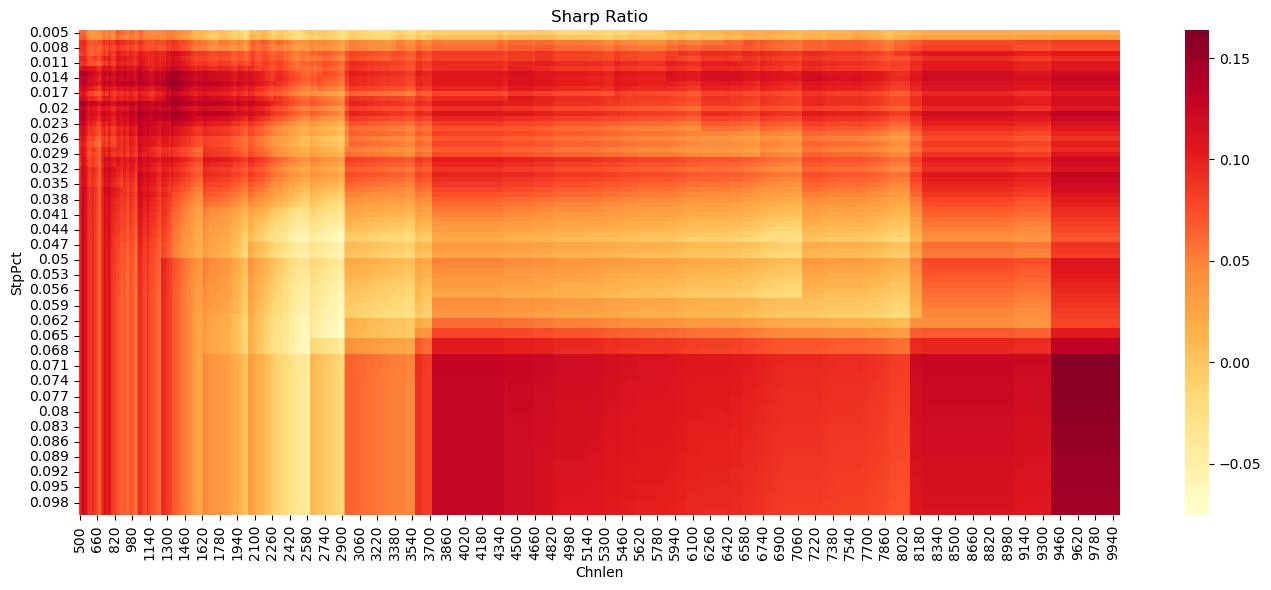

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

net_asset_data = df[['Chnlen', 'StpPct', 'Net Asset to Worst Drawdown']]

sharpe_ratio_data = df[['Chnlen', 'StpPct', 'Sharpe Ratio']]

net_asset_pivot = net_asset_data.pivot_table(index="StpPct", columns="Chnlen", values="Net Asset to Worst Drawdown")
sharpe_ratio_pivot = sharpe_ratio_data.pivot_table(index="StpPct", columns="Chnlen", values="Sharpe Ratio")

cmap = 'YlOrRd'  

plt.figure(figsize=(14, 6))
sns.heatmap(net_asset_pivot, annot=False, cmap=cmap)
plt.title('Net Asset to Worst Drawdown')
plt.xlabel('Chnlen')
plt.ylabel('StpPct')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.heatmap(sharpe_ratio_pivot, annot=False, cmap=cmap)
plt.title('Sharp Ratio')
plt.xlabel('Chnlen')
plt.ylabel('StpPct')
plt.tight_layout()
plt.show()

